In [2]:
import pandas as pd

# Load the CSV files
baseball_relationships_path = '/home/jovyan/MGTA453_Week6_Case/BaseballRelationships.parquet'
basketball_relationships_path = '/home/jovyan/MGTA453_Week6_Case/BasketballRelationships.parquet'
nba_pgdata_path = '/home/jovyan/MGTA453_Week6_Case/nba_pgdata.parquet'

# Reading the data from each file
baseball_relationships = pd.read_parquet(baseball_relationships_path)
basketball_relationships = pd.read_parquet(basketball_relationships_path)
nba_pgdata = pd.read_parquet(nba_pgdata_path)

# Displaying the first few rows of each dataframe for an overview
baseball_relationships.head(), basketball_relationships.head(), nba_pgdata.head()

(   atbats  hits       avg
 0     384    97  0.252604
 1     296    84  0.283784
 2     334    94  0.281437
 3     626   176  0.281150
 4     558   130  0.232975,
    attempts  percentage  points
 0       905    0.438674    1057
 1      1318    0.484067    1560
 2       638    0.445141     705
 3       474    0.474684     555
 4      1489    0.449295    1920,
           Player    Salary  Age        FG         RB       AST       STL  \
 0     A.J. Price    885.12   26  2.824561   2.000000  3.596491  0.578947   
 1   Aaron Brooks   3250.00   28  2.698113   1.509434  2.150943  0.566038   
 2  Al Harrington   6687.40   32  2.000000   2.700000  1.000000  0.400000   
 3     Al Horford  12000.00   26  7.783784  10.229730  3.243243  1.054054   
 4   Al Jefferson  15000.00   28  7.833333   9.230769  2.102564  1.025641   
 
         BLK        PTS  
 0  0.052632   7.736842  
 1  0.188679   7.094340  
 2  0.100000   5.100000  
 3  1.054054  17.418919  
 4  1.141026  17.833333  )

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

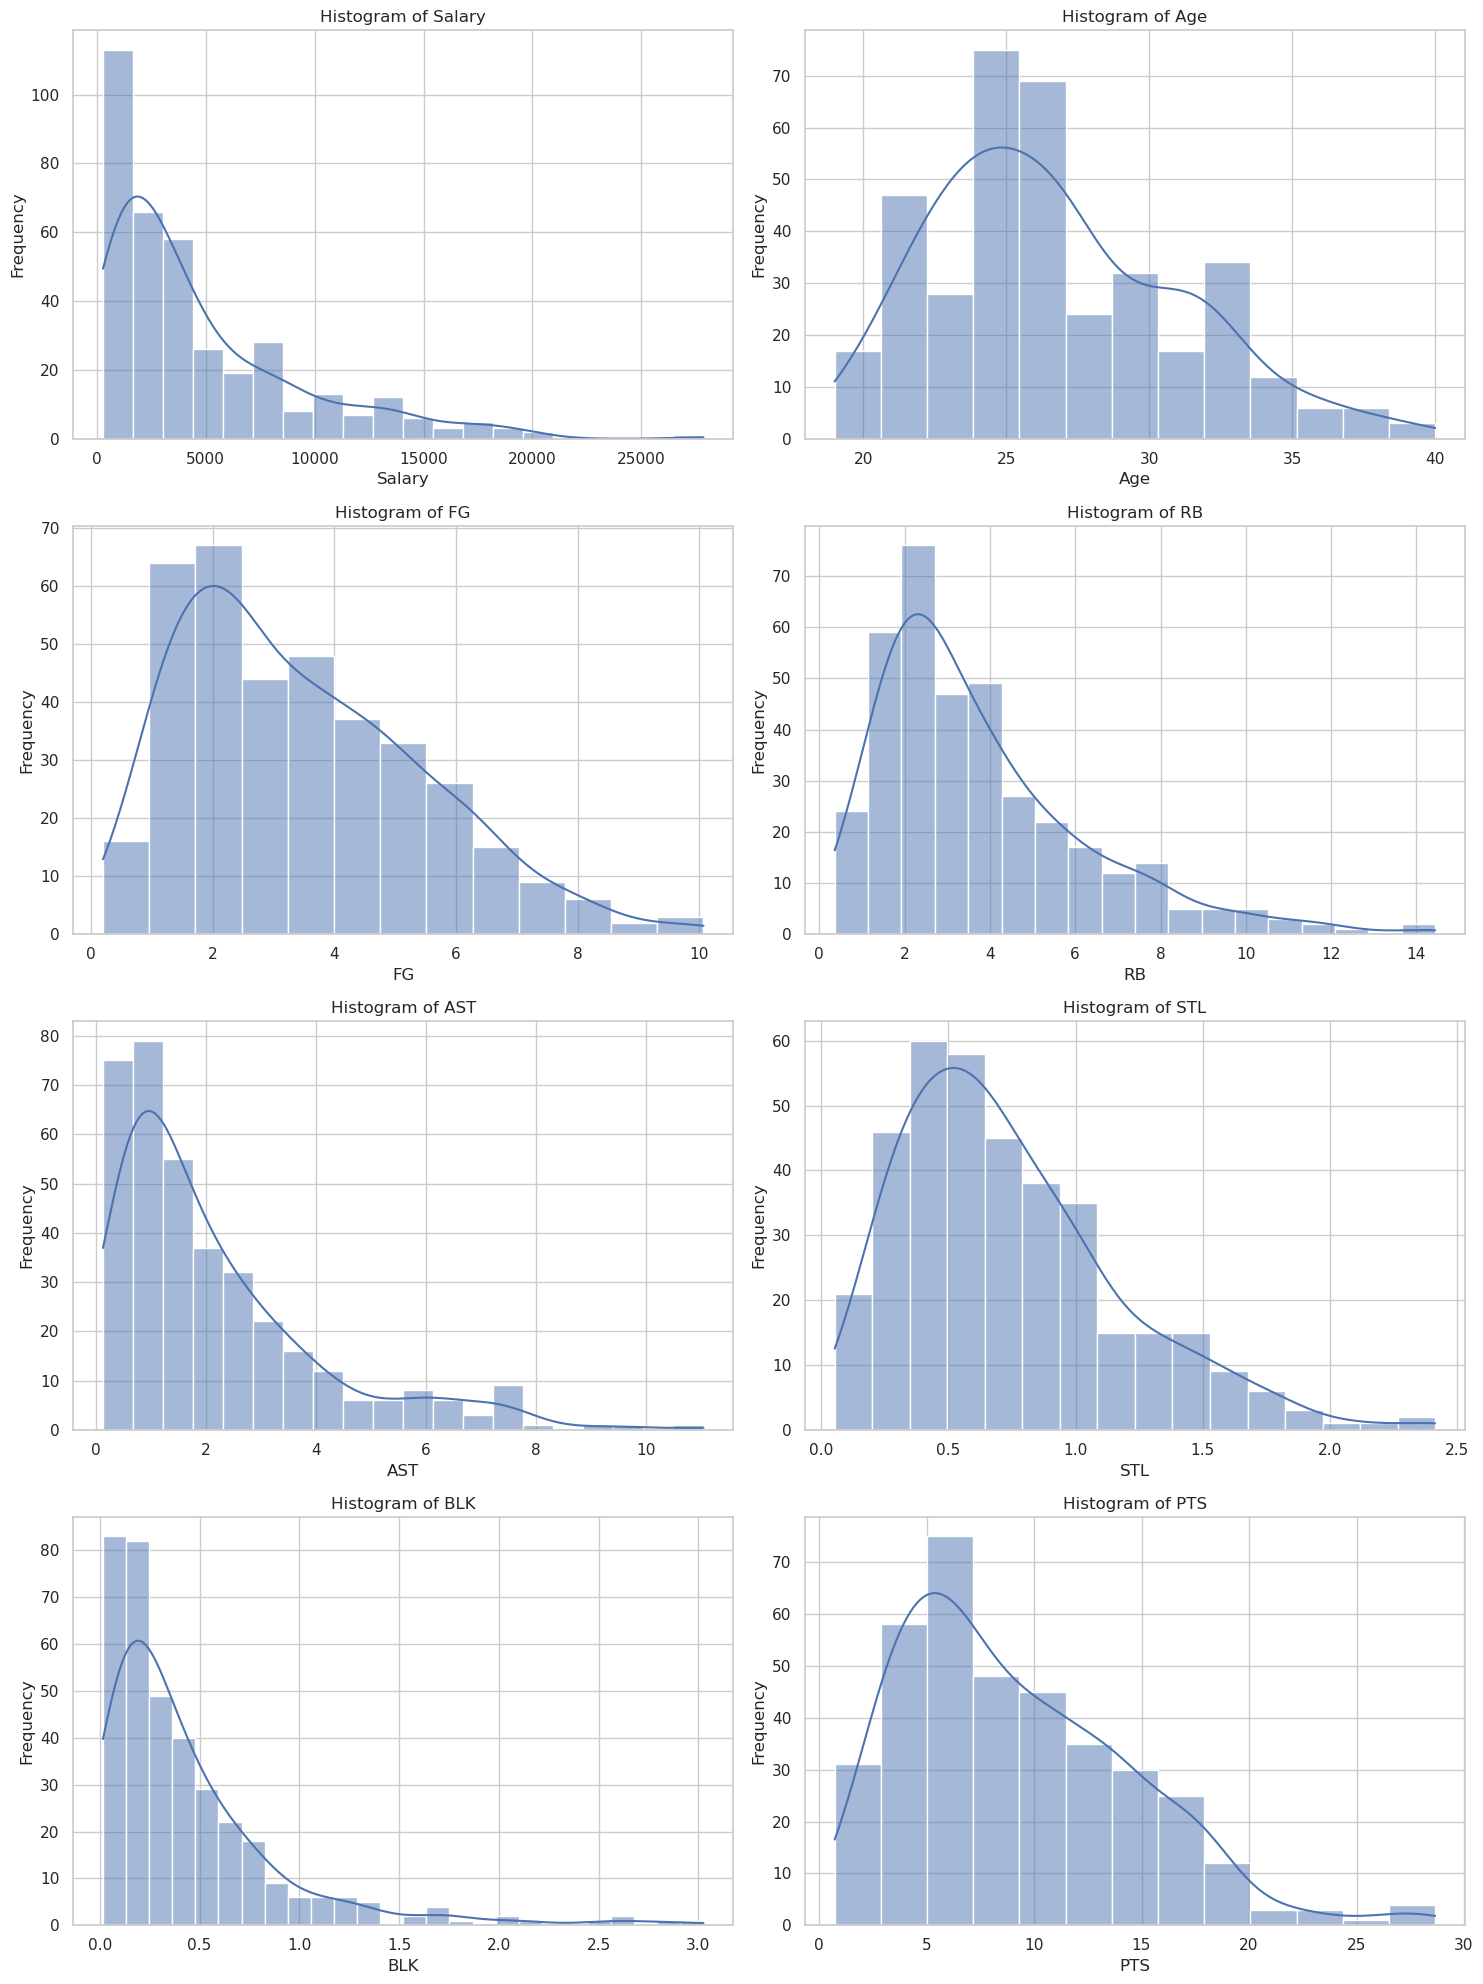

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

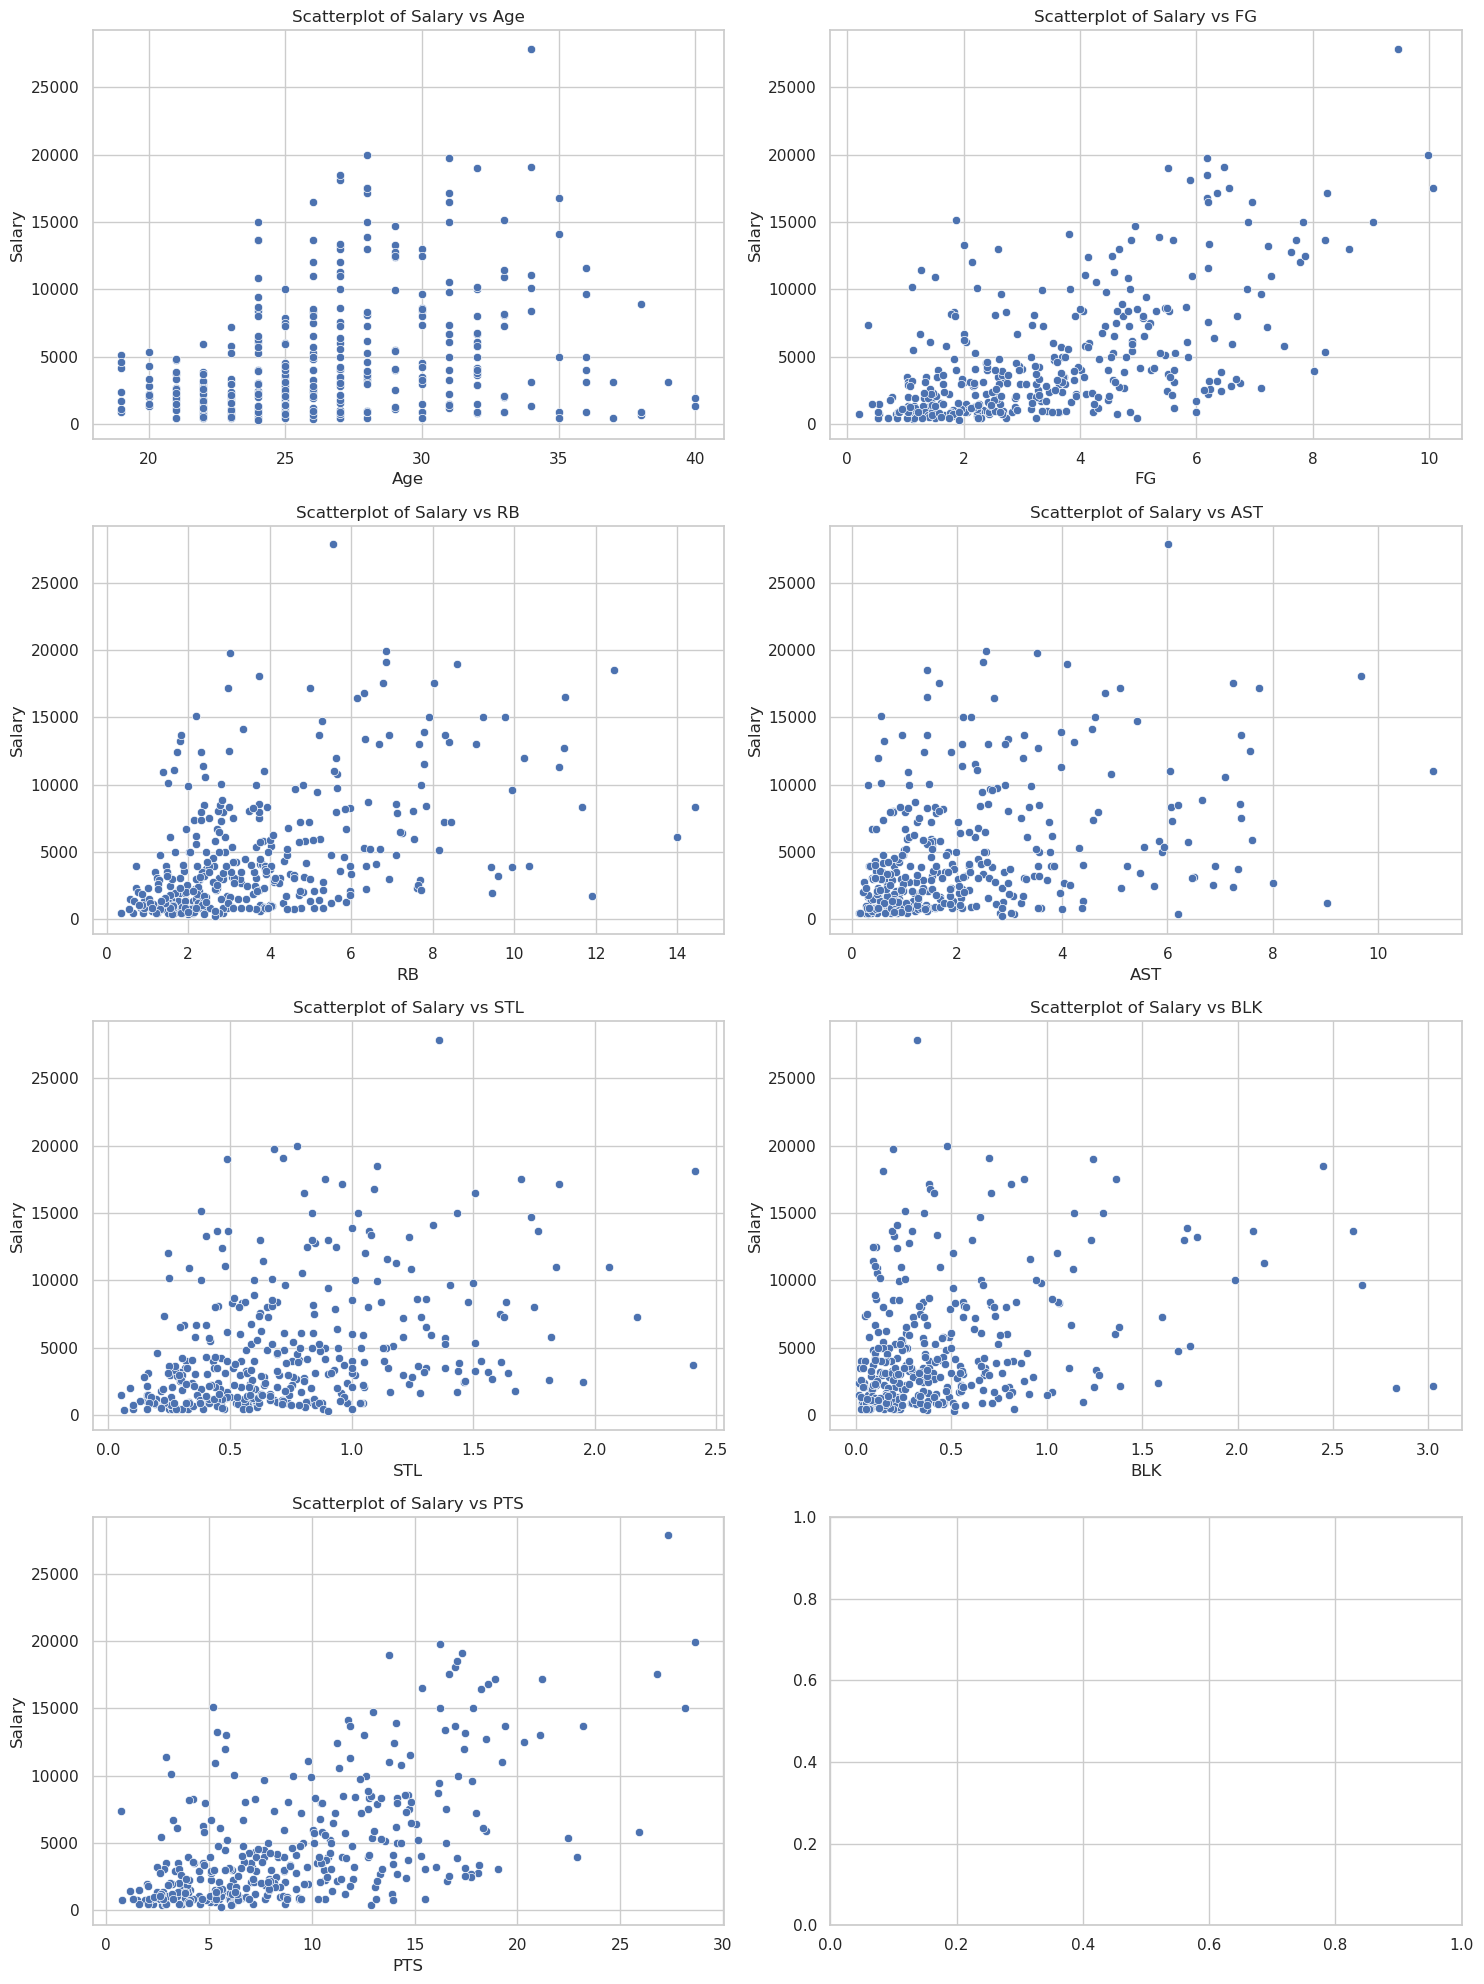

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each specified column in nba_pgdata
columns_to_plot = ['Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(nba_pgdata[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Creating scatterplots for Salary versus each predictor
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot[1:]): # Skipping 'Salary' for x-axis
    sns.scatterplot(x=nba_pgdata[col], y=nba_pgdata['Salary'], ax=axes[i])
    axes[i].set_title(f'Scatterplot of Salary vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Salary')

plt.tight_layout()
plt.show()

The visualizations provide insight into the distributions of various NBA player statistics and their relationship with salaries:

**Histograms of Player Statistics**

**Salary:** The distribution of salaries is **right-skewed**, indicating that most players earn lower salaries, with a few earning significantly higher.

**Age**: The age distribution appears **somewhat normally distributed**, centered around the late 20s to early 30s.

**FG (Field Goals):** This distribution is **slightly right-skewed**, suggesting most players have a lower average of field goals, with fewer players achieving higher averages.

**RB (Rebounds):** The distribution of rebounds is **right-skewed**, similar to field goals, indicating that higher rebound numbers are less common.

**AST (Assists):** Assists per game also show a **right-skewed distribution**, with most players averaging fewer assists.

**STL (Steals):** The distribution of steals is **right-skewed**, indicating that high steal rates are less common among players.

**BLK (Blocks):** The blocks per game distribution is **right-skewed**, with most players having fewer blocks.

**PTS (Points):** The points distribution is right-skewed, with a majority of players scoring fewer points and a few scoring significantly higher.

**Scatterplots of Salary vs. Predictors**

**Salary vs. Age:** There does not appear to be a *strong linear relationship* between age and salary. Salaries are varied across different age groups.

**Salary vs. FG:** There seems to be a *positive relationship* between field goals and salary, with players with higher FG averages generally earning more.

**Salary vs. RB:** The relationship between rebounds and salary is less clear but suggests that players with higher rebound numbers might have higher salaries.

**Salary vs. AST:** There is a *slight positive trend*, indicating players with more assists might earn higher salaries.

**Salary vs. STL:** The scatterplot shows a *less distinct trend*, indicating a weak relationship between steals and salary.

**Salary vs. BLK:** The relationship between blocks and salary is *not strongly linear*, but players with more blocks might have slightly higher salaries.

**Salary vs. PTS:** There is a *positive trend*, suggesting players scoring more points tend to have higher salaries.


In [29]:
import pyrsm as rsm

reg_A = rsm.regress({"nba": nba_pgdata}, rvar="Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
reg_A.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept     -8724.67   1131.833   -7.708  < .001  ***
Age             312.09     39.520    7.897  < .001  ***
FG             1156.98    153.881    7.519  < .001  ***
RB              223.31    117.004    1.909   0.057    .
AST             280.50    146.504    1.915   0.056    .
STL           -1064.07    613.248   -1.735   0.084    .
BLK            1071.10    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


**Significance of Predictors:**

Age: Significant (p < .001). Positive coefficient indicates salary increases with age.

FG (Field Goals): Significant (p < .001). Higher FG leads to a higher salary.

RB (Rebounds): Marginally significant (p = 0.057). Suggests a slight positive effect on salary.

AST (Assists): Marginally significant (p = 0.056). Indicates a small positive effect on salary.

STL (Steals): Not significant (p = 0.084). Negative coefficient suggests higher steals could decrease salary, but this is not statistically significant.

BLK (Blocks): Significant (p = 0.039). Positive coefficient indicates higher blocks lead to higher salary.

**Underlying Hypothesis Test for Each Predictor:**

Each coefficient's significance is tested against the null hypothesis that the predictor has no effect on the salary. The p-values indicate whether to reject this null hypothesis.

**Meaning of Estimated Values for Coefficients:**

Each coefficient represents the expected change in salary (in the units of the dataset, likely thousands of dollars) for a one-unit increase in the predictor, holding all other predictors constant.

**Most Impactful Predictor:**

*Among significant predictors, FG has the highest coefficient (1156.98), suggesting it's the most impactful on salary.*

**R-squared Value Interpretation:**

R-squared of 0.492 indicates that approximately 49.2% of the variability in Salary can be explained by the model.

Adjusted R-squared of 0.484 accounts for the number of predictors in the model and provides a more accurate measure of model fit.

This value is moderately high, indicating a decent model fit, but also suggests other factors not included in the model may significantly influence Salary.


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

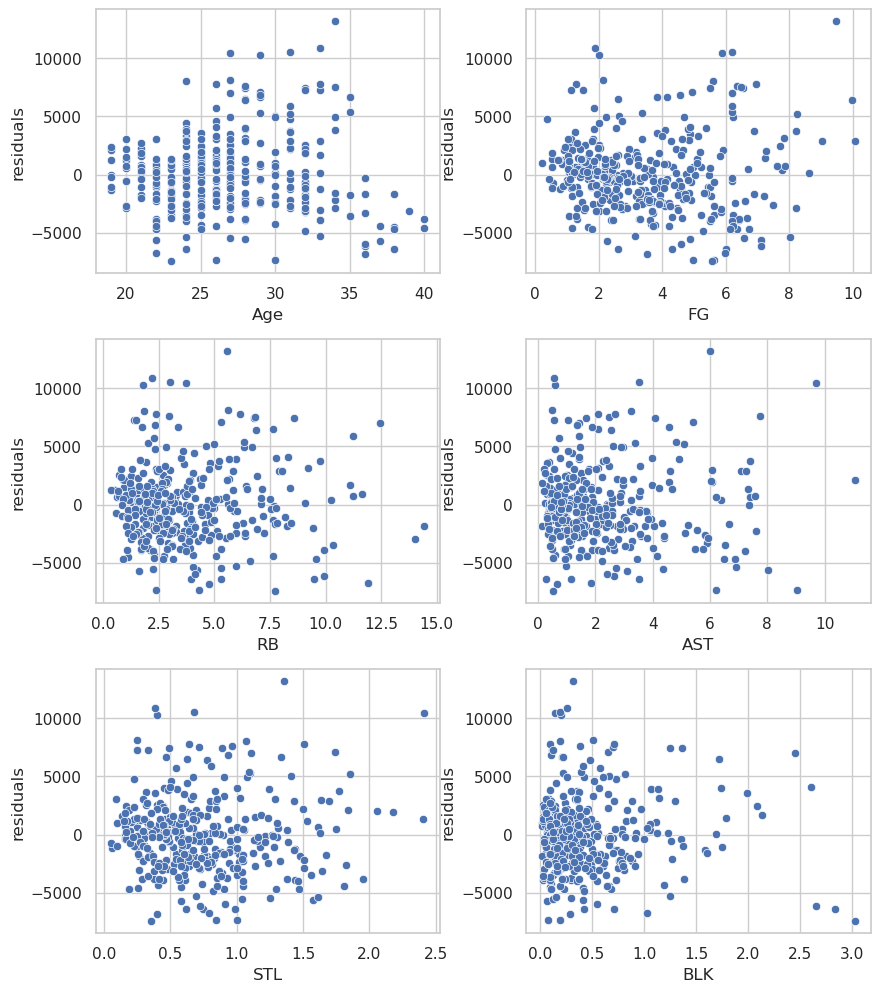

In [30]:
reg_A.plot("residual")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

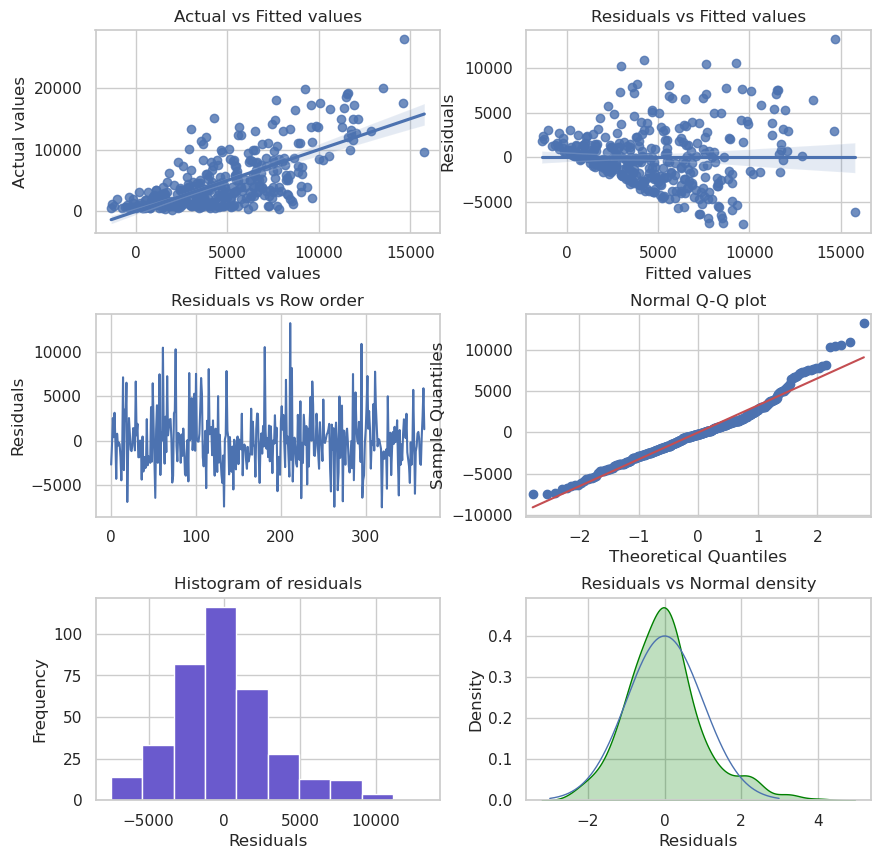

In [31]:
reg_A.plot("dashboard")

**Actual vs Fitted Values:**

The upward trend indicates that, generally, as predicted salaries increase, the actual salaries increase, which is good. However, there's a spread that suggests variability in the model's accuracy across different salary ranges.


**Residuals vs Fitted Values:**

Residuals are the differences between the actual and predicted values.

The funnel shape here (heteroscedasticity) indicates that the variance of the residuals is not constant. The model is less reliable at predicting higher salaries.

**Interpretation Summary:**

The residuals exhibit heteroscedasticity, which violates the constant variance assumption of OLS regression. This could be addressed with transformation techniques or robust regression methods.
Considering transformations could potentially improve the model's performance.

In [23]:
import numpy as np

nba_pgdata['log_Salary'] = np.log(nba_pgdata.Salary)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

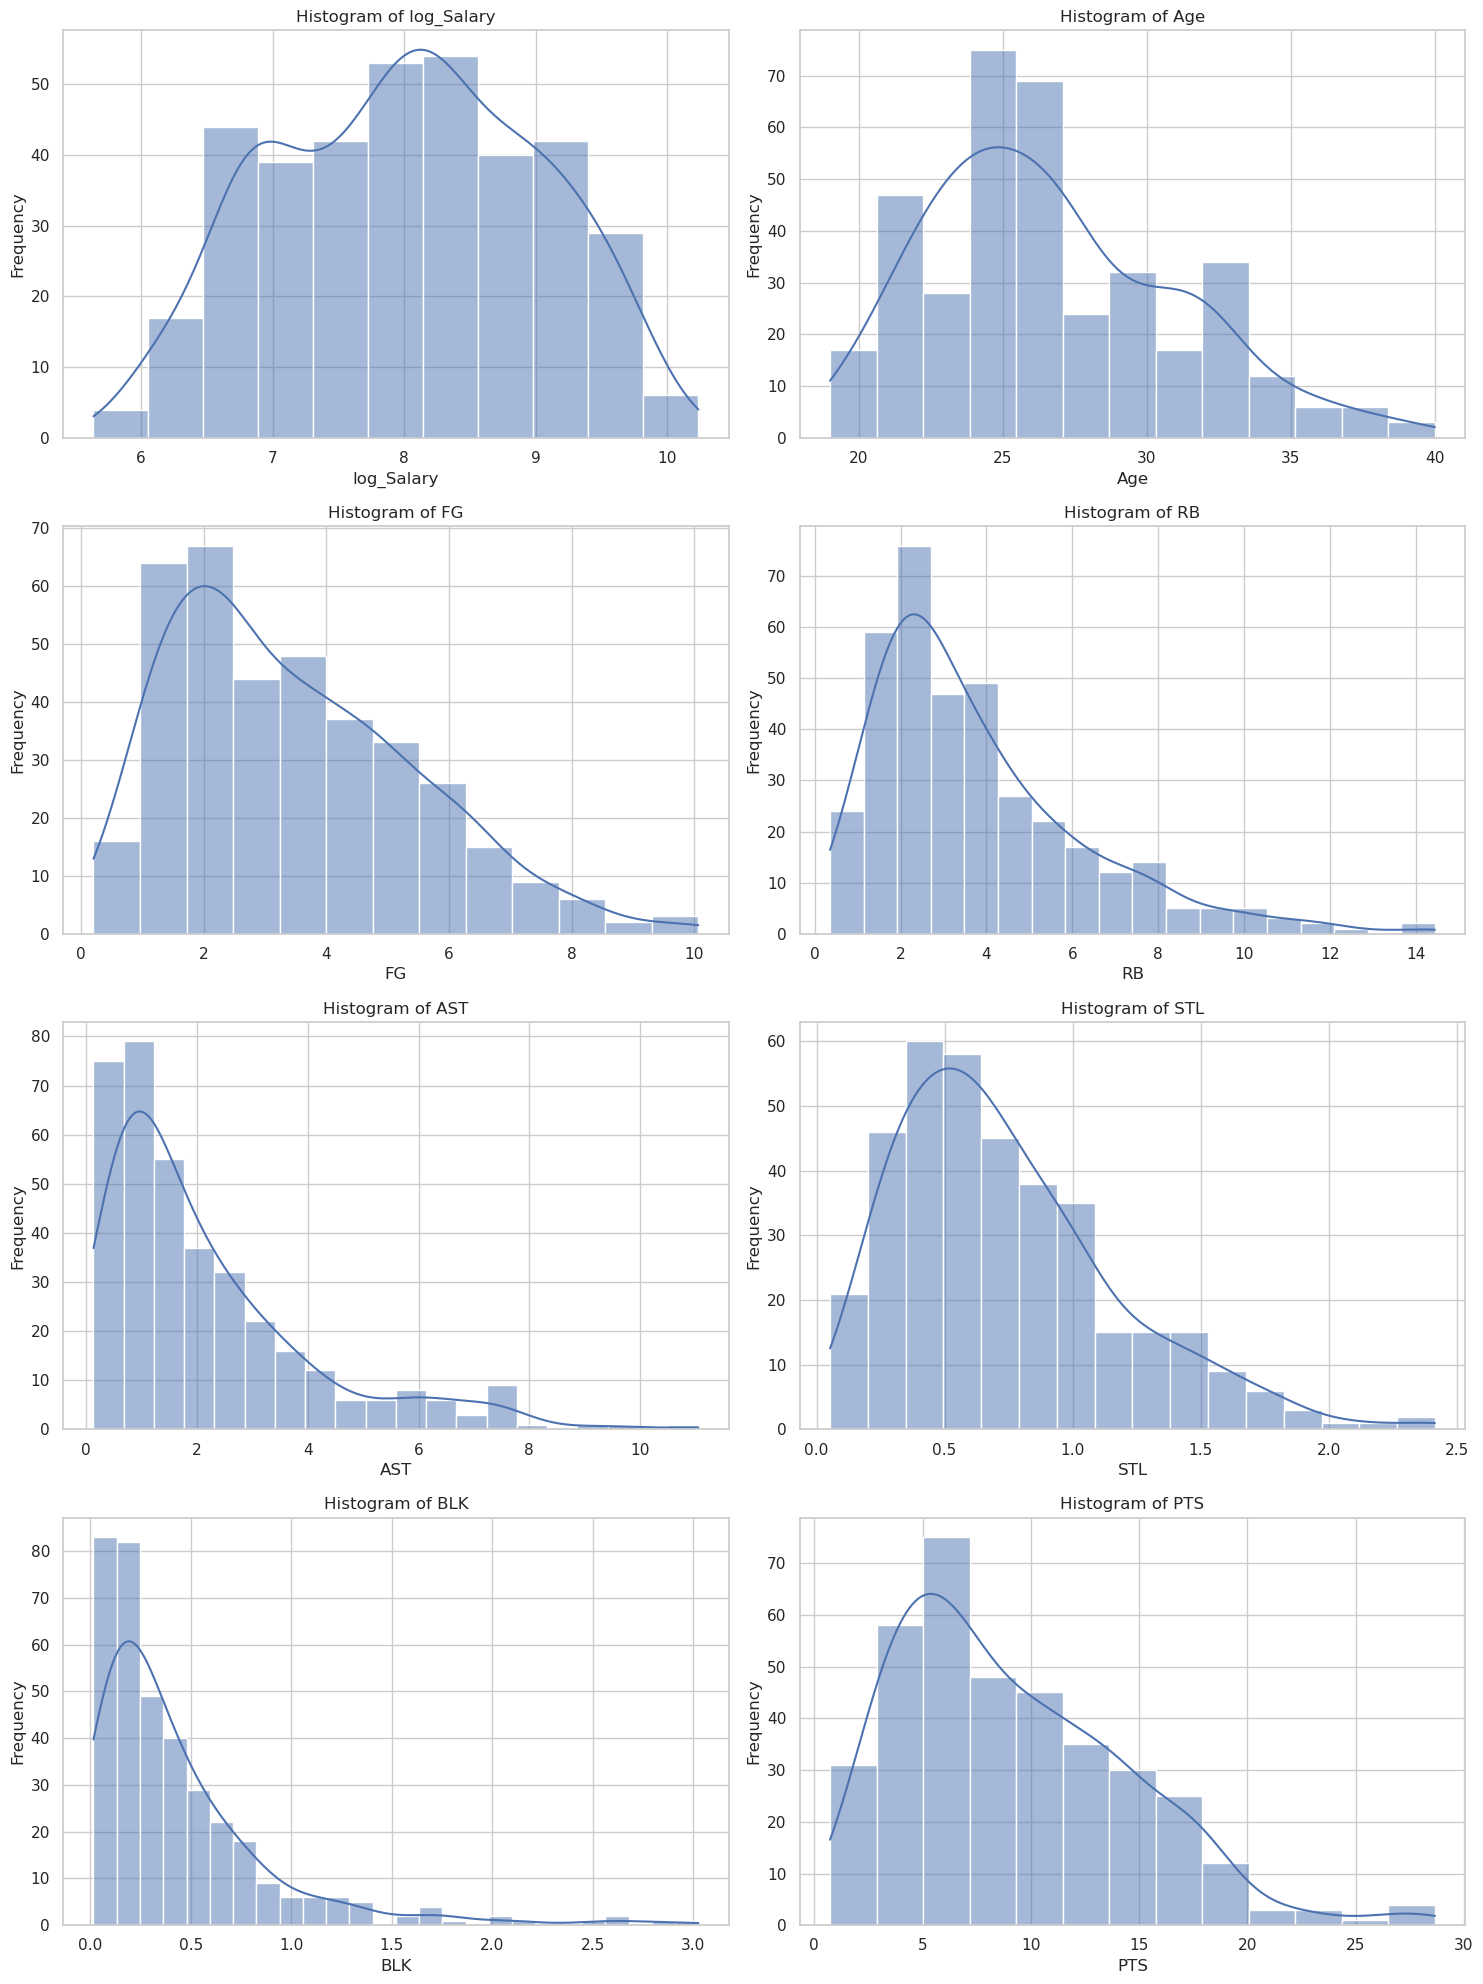

In [24]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each specified column in nba_pgdata
columns_to_plot = ['log_Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(nba_pgdata[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now, log_Salary graph is more normally distributed.

In [26]:
reg_B = rsm.regress({"nba": nba_pgdata}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
reg_B.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.255   20.803  < .001  ***
Age               0.06      0.009    6.487  < .001  ***
FG                0.21      0.035    5.994  < .001  ***
RB                0.07      0.026    2.533   0.012    *
AST               0.05      0.033    1.403   0.162     
STL               0.00      0.138    0.013    0.99     
BLK               0.21      0.116    1.807   0.072    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.455, Adjusted R-squared: 0.446
F-statistic: 50.599 df(6, 363), p.value < 0.001
Nr obs: 370


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

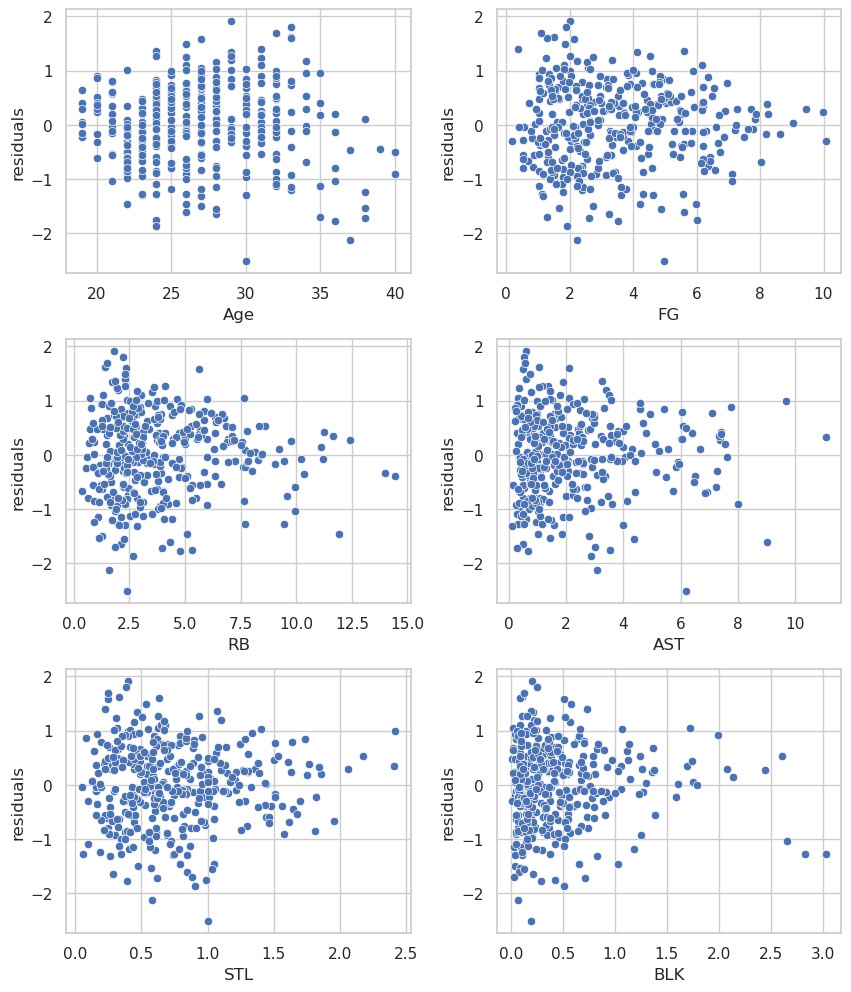

In [27]:
reg_B.plot("residual")

Based on the provided output of the OLS regression with log-transformed salary as the response variable, let's interpret the coefficients and the model:

Interpretation of Estimated Coefficients:
Significance of Predictors:

Intercept: Significantly different from zero.
**Age: Significant (p < .001).** The positive coefficient suggests that as age increases, so does the log of salary, indicating a multiplicative effect on salary.
**FG (Field Goals): Significant (p < .001).** Positive coefficient implies a substantial multiplicative effect on salary.
**RB (Rebounds): Significant (p = 0.012).** Positive coefficient indicates a smaller, yet significant, multiplicative effect on salary.
**AST (Assists): Not significant (p = 0.162).** The effect of assists on log salary is not statistically significant.
**STL (Steals): Not significant (p = 0.99).** Steals do not have a significant effect on log salary.
**BLK (Blocks): Marginally significant (p = 0.072).** Positive coefficient suggests a potential effect on log salary, but it's not statistically significant at the conventional 0.05 level.

performance metrics like *FG and RB are associated with higher salaries*. The significance of Age reflects the fact that veteran players often have higher salaries due to their experience and established skill.

**Estimated Values for Coefficients:**

Since the salary is log-transformed, each coefficient represents the expected percentage change in salary for a one-unit increase in the predictor, holding all other predictors constant.

**Most Impactful Predictor:**

**FG and BLK have the highest coefficients (0.21), suggesting they have the most substantial effect on salary among significant variables. However, FG is statistically significant, making it the most impactful predictor in this model.**

**R-squared Value Interpretation:**
**An R-squared of 0.455 suggests that the model explains about 45.5% of the variability in the log-transformed salary.**
The adjusted R-squared of 0.446 accounts for the number of predictors and the number of observations, and is a better measure when comparing models with different numbers of predictors.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

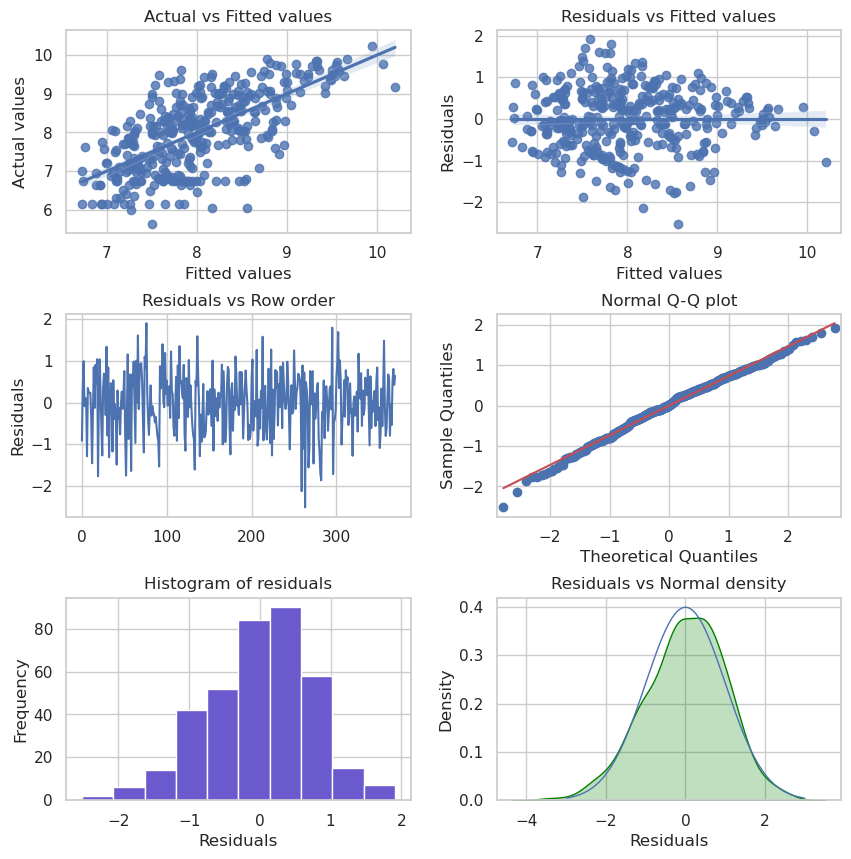

In [28]:
reg_B.plot("dashboard")

Actual vs Fitted Values:

This plot compares the actual log salaries to those predicted by the model.
The points should ideally form a diagonal line if the predictions are perfect.
The plot shows a positive correlation, which is good, but also indicates some spread, suggesting that the model's accuracy varies across different values of log salary.
Residuals vs Fitted Values:

Residuals should be randomly scattered around the horizontal line at zero with no discernible pattern.
The plot displays a random scatter of residuals around the zero line, which is a good indication that the model doesn't suffer from non-linearity or heteroscedasticity issues.

In [32]:
reg_C = rsm.regress({"nba": nba_pgdata}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK", "PTS"])
reg_C.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.253   20.944  < .001  ***
Age               0.06      0.009    6.524  < .001  ***
FG               -0.12      0.130   -0.901   0.368     
RB                0.08      0.027    3.081   0.002   **
AST               0.04      0.033    1.347   0.179     
STL              -0.05      0.139   -0.378   0.706     
BLK               0.25      0.117    2.153   0.032    *
PTS               0.12      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.013 df(7, 362), p.value < 0.001
Nr obs: 370


**Change in Coefficients:**

The coefficient for FG has changed from positive to negative (-0.12) and is now not statistically significant (p = 0.368), suggesting that FG does not have a significant impact on log_Salary once PTS is included in the model.
**The coefficient for PTS is positive (0.12) and significant (p = 0.01), indicating that points scored is a significant predictor of log_Salary.**

**Significance of Other Variables:**

RB's coefficient has increased slightly and remains significant, indicating a robust and slightly stronger relationship with log_Salary.
BLK has also remained significant, but with an increase in its coefficient from the previous model without PTS, suggesting that blocks are still an important predictor of log_Salary.
Age remains a significant predictor with a similar coefficient as before.
AST, STL, and Age have not changed in terms of significance; they remain not significant.

**The R-squared has increased from 0.455 to 0.465, indicating that adding PTS to the model has improved the model's explanation of the variability in log_Salary by 1%.**
The Adjusted R-squared has also increased to 0.455, suggesting that the increase in explanatory power is not just due to adding another variable but represents a genuine improvement in model fit.

The addition of PTS appears to capture some of the influence on salary that might have been previously attributed to FG, given the shift in FG’s significance and coefficient direction.

**This might indicate that the scoring points (PTS) is a better indicator of a player's offensive contribution to their salary than simply the number of field goals made, as it encapsulates the value of both two-pointers, three-pointers, and free throws.**

**The model suggests that while other performance metrics are important, scoring ability (as measured by PTS) is a significant determinant of a player's salary in the NBA.**

**The inclusion of PTS seems to have provided additional insight into what factors are valued in the NBA salary structure, emphasizing the importance of a player's scoring ability.**

In [35]:
from sklearn.preprocessing import StandardScaler
df = nba_pgdata.copy()
df[["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]] = StandardScaler().fit_transform(df[["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]])

In [36]:
reg_D = rsm.regress({"nba": df}, rvar="log_Salary", evar=["Age", "RB", "AST", "STL", "BLK", "PTS"])
reg_D.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        -0.00      0.038   -0.000     1.0     
Age               0.25      0.039    6.544  < .001  ***
RB                0.18      0.063    2.953   0.003   **
AST               0.08      0.062    1.266   0.206     
STL              -0.02      0.060   -0.301   0.763     
BLK               0.11      0.054    2.045   0.042    *
PTS               0.43      0.066    6.513  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.407 df(6, 363), p.value < 0.001
Nr obs: 370



**Age: The coefficient for Age is 0.25 and significant (p < .001), indicating that age is a strong predictor of log_Salary.** 

**RB (Rebounds): With a coefficient of 0.18 and a p-value of 0.003, rebounds are a significant predictor of log_Salary**

AST (Assists): The coefficient for assists is 0.08, but it's not significant (p = 0.206), suggesting that assists are not a strong predictor of log_Salary in this model.

STL (Steals): The coefficient for steals is -0.02 and not significant (p = 0.763), implying that steals do not have a significant predictive power on log_Salary.

BLK (Blocks): Blocks have a coefficient of 0.11 and are marginally significant (p = 0.042), indicating a moderate predictive power on log_Salary.

**PTS (Points): Points scored has the highest coefficient of 0.43, which is highly significant (p < .001). This suggests that PTS is the strongest predictor of log_Salary among all the variables included in the model.**

R-squared: The R-squared value remains virtually unchanged at 0.464 compared to the previous model including FG, indicating the model explains about 46.4% of the variability in log_Salary.

Adjusted R-squared: The Adjusted R-squared is 0.455, which accounts for the number of predictors in the model. This value is close to the R-squared, suggesting that the model with these predictors is appropriate for the number of variables included.

**F-statistic: The F-statistic is significant (p < 0.001), indicating that the model is a good fit for the data compared to a model with no explanatory variables.**

Summary:
**By dropping FG and using PTS along with standardized coefficients, it becomes clear that scoring points is the most substantial contributor to a player's salary, followed by Age and Rebounds. Assists, Steals, and Blocks have less predictive power. The standardized coefficients allow for direct comparison of the predictors' impact on the log_Salary, indicating the relative importance of each variable in the model.**

Conditional Probability Analysis
From Table 1, we can observe the probabilities for players hitting a shot after having missed one (P{hit | 1 miss}) and after having made one (P{hit | 1 hit}). The idea is to see if making a shot increases the probability of making the next one (indicative of a 'hot hand').

Bird's Eye View Analysis
We look for players whose probability of making a shot (P{hit | 1 hit}) is significantly higher than their overall shooting probability (P{hit}).
Players with higher P{hit | 1 hit} than P{hit} could be considered to have a 'hot hand'.
Conversely, players with lower or equal P{hit | 1 hit} compared to P{hit} would not exhibit the 'hot hand' phenomenon.

***Player B has a higher probability of having a hot hand*** 

Statistical Test for Each Player
**Null Hypothesis (H0):** There is no difference between P{hit | 1 hit} and P{hit} for a player.
**Alternative Hypothesis (H1):** P{hit | 1 hit} is significantly different from P{hit}.

**The null hypothesis : could be that there's no difference in these probabilities, suggesting no "hot hand" effect.**
**The alternative hypothesis : would be that the probabilities are different, suggesting the presence of the "hot hand" phenomenon.**

**Null Hypothesis{hit | 1 hit} = {hit | 1 miss}**

**Alternative Hypothesis(H1): {hit | 1 hit}≠ {hit | 1 miss} = P{hit | 1 hit} ≠ P{hit | 1 miss}**


In [37]:
import pandas as pd

file_path = '/home/jovyan/MGTA453_Week6_Case/BasketballRelationships.parquet'  
basketball_data = pd.read_parquet(file_path)

In [38]:
rsm.radiant.single_prop({'basketball.parquet':basketball_data},code=True) 

Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


In [39]:
data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E', 'Player F', 'Player G', 'Player H', 'Player I'],
    'P(hit | 1 miss)': [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'P(hit | 1 hit)': [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]
}

# Creating the DataFrame
player_stats_df = pd.DataFrame(data)
player_stats_df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit)
0,Player A,0.56,0.50,0.49
1,Player B,0.51,0.52,0.53
2,Player C,0.46,0.46,0.46
3,Player D,0.60,0.56,0.55
4,Player E,0.47,0.47,0.45
5,Player F,0.51,0.46,0.43
6,Player G,0.58,0.54,0.53
7,Player H,0.52,0.52,0.51
8,Player I,0.71,0.62,0.57


In [41]:
player_stats_df['probability_difference'] = player_stats_df['P(hit | 1 hit)'] - player_stats_df['P(hit)']

player_stats_df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit),probability_difference
0,Player A,0.56,0.50,0.49,-0.01
1,Player B,0.51,0.52,0.53,0.01
2,Player C,0.46,0.46,0.46,0.00
3,Player D,0.60,0.56,0.55,-0.01
4,Player E,0.47,0.47,0.45,-0.02
5,Player F,0.51,0.46,0.43,-0.03
6,Player G,0.58,0.54,0.53,-0.01
7,Player H,0.52,0.52,0.51,-0.01
8,Player I,0.71,0.62,0.57,-0.05


**The Null Hypothesis is the mean of probability difference is 0**

**The Alternate Hypothesis is the mean of probability difference is greater than 0**

In [42]:
sm_player_stats_df = rsm.basics.single_mean({"player_stats": player_stats_df}, "probability_difference", "greater", 0.95, 0)
sm_player_stats_df.summary()

Single mean test
Data      : player_stats
Variables : probability_difference
Confidence: 0.95
Comparison: 0

Null hyp. : the mean of probability_difference is equal to 0
Alt. hyp. : the mean of probability_difference is greater than 0

  mean  n  n_missing    sd    se    me
-0.014  9          0 0.017 0.006 0.013
  diff    se  t.value  p.value  df   5.0%  100%  
-0.014 0.006    -2.49    0.981   8 -0.025   inf  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


***Since the p-value is 0.98 > 0.05, we fail to reject the null hypothesis. This means that there is no significant difference between the probabilities of making a shot after a hit vs. after a miss for this player. Therefore, we cannot conclude that this player exhibits the "hot hand" phenomenon.***

In [50]:
# Simulating the expected number of runs and standard deviation for the given players

import numpy as np

# Function to simulate the number of runs for a given number of shots n and probability p
def simulate_runs(n, p, simulations=30000):
    runs_list = []
    for _ in range(simulations):
        # Generate a sequence of shots
        shots = np.random.choice(['H', 'M'], size=n, p=[p, 1-p])
        # Count the runs
        runs = 1 + sum(shots[i] != shots[i-1] for i in range(1, n))
        runs_list.append(runs)
    return np.mean(runs_list), np.std(runs_list)

# Player data with the probability of making a shot (P(hit)) and the number of shots taken
player_data = {
    'Player A': {'P(hit)': 0.50, 'Shots': 248},
    'Player B': {'P(hit)': 0.52, 'Shots': 884},
    'Player C': {'P(hit)': 0.46, 'Shots': 419},
    'Player D': {'P(hit)': 0.56, 'Shots': 339},
    'Player E': {'P(hit)': 0.47, 'Shots': 272},
    'Player F': {'P(hit)': 0.46, 'Shots': 451},
    'Player G': {'P(hit)': 0.54, 'Shots': 433},
    'Player H': {'P(hit)': 0.52, 'Shots': 351},
    'Player I': {'P(hit)': 0.62, 'Shots': 403},
}

# Simulate the expected number of runs and the standard deviation for each player
simulation_results = {player: simulate_runs(data['Shots'], data['P(hit)']) for player, data in player_data.items()}

# Convert the simulation results into a DataFrame for easy viewing
simulation_df = pd.DataFrame(simulation_results, index=['Expected Runs', 'Standard Deviation']).T
simulation_df.reset_index(inplace=True)
simulation_df.rename(columns={'index': 'Player'}, inplace=True)
simulation_df


,Player,Expected Runs,Standard Deviation
0,Player A,124.531800,7.860780
1,Player B,441.975433,14.889541
2,Player C,208.657733,10.234620
3,Player D,167.559467,9.322918
4,Player E,136.033967,8.266528
5,Player F,224.653900,10.634459
6,Player G,215.617767,10.467941
7,Player H,175.719667,9.405588
8,Player I,190.453933,10.467130


In [51]:
simulation_df['Actual Runs'] = [128, 431, 203, 172, 134, 245, 227, 176, 220]

simulation_df

,Player,Expected Runs,Standard Deviation,Actual Runs
0,Player A,124.531800,7.860780,128
1,Player B,441.975433,14.889541,431
2,Player C,208.657733,10.234620,203
3,Player D,167.559467,9.322918,172
4,Player E,136.033967,8.266528,134
5,Player F,224.653900,10.634459,245
6,Player G,215.617767,10.467941,227
7,Player H,175.719667,9.405588,176
8,Player I,190.453933,10.467130,220


In [ ]:
for i in range(len(simulation_df)):
    simulation_df.loc[i, 'Expected Runs'] = simulation_df.loc[i, 'probability_difference']
sm_simulation_df = rsm.basics.single_mean({"simulation": simulation_df}, "Actual Runs", "less", 0.95, simulation_df.loc[i, 'Expected Runs'])
sm_simulation_df.summary()

In [53]:
from scipy.stats import norm

# Calculate the standard error (SE) for each player
# Since the standard deviations are from simulations, we divide by the square root of the number of shots (n)
simulation_df['Standard Error'] = simulation_df['Standard Deviation'] / np.sqrt(30000)

# Calculate the z-score for each player
# Z = (observed - expected) / SE
simulation_df['z-score'] = (simulation_df['Actual Runs'] - simulation_df['Expected Runs']) / simulation_df['Standard Error']

# Calculate the p-value for the z-score for a one-tailed test
simulation_df['p-value'] = norm.cdf(simulation_df['z-score'])

# Apply the significance level to test the hypothesis
# If the p-value is less than 0.05 (for a 95% confidence level), we reject the null hypothesis.
alpha = 0.05
simulation_df['Reject H0'] = simulation_df['p-value'] < alpha

simulation_df[['Expected Runs', 'Standard Deviation', 'Standard Error', 'Actual Runs', 'z-score', 'p-value', 'Reject H0']]


,Expected Runs,Standard Deviation,Standard Error,Actual Runs,z-score,p-value,Reject H0
0,124.531800,7.860780,0.045384,128,76.418612,1.0,False
1,441.975433,14.889541,0.085965,431,-127.673568,0.0,True
2,208.657733,10.234620,0.059090,203,-95.748364,0.0,True
3,167.559467,9.322918,0.053826,172,82.498092,1.0,False
4,136.033967,8.266528,0.047727,134,-42.616849,0.0,True
5,224.653900,10.634459,0.061398,245,331.380087,1.0,False
6,215.617767,10.467941,0.060437,227,188.333175,1.0,False
7,175.719667,9.405588,0.054303,176,5.162374,1.0,False
8,190.453933,10.467130,0.060432,220,488.914234,1.0,False


In [ ]:
rsm.prob_chisq(p, q, t)

In [59]:
rsm.radiant.prob_calc({'simulation':simulation_df})

Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


In [58]:
rsm.radiant.single_prop({'simulation':simulation_df},code=True) 

Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


```python
import pyrsm as rsm

# simulation = pd.read_parquet('simulation.parquet')
sp = rsm.basics.single_prop(
    data={"simulation": simulation}, var="Player", lev="Player A"
)
sp.plot(plots="bar")

```

In [64]:
ct = rsm.basics.cross_tabs({'simulation':simulation_df}, var1="Actual Runs", var2="Expected Runs")

ct.observed

Expected Runs,124.5318,136.03396666666666,167.55946666666668,175.71966666666665,190.45393333333334,208.65773333333334,215.61776666666665,224.6539,441.97543333333334,Total
Actual Runs,,,,,,,,,,
128,1,0,0,0,0,0,0,0,0,1
134,0,1,0,0,0,0,0,0,0,1
172,0,0,1,0,0,0,0,0,0,1
176,0,0,0,1,0,0,0,0,0,1
203,0,0,0,0,0,1,0,0,0,1
220,0,0,0,0,1,0,0,0,0,1
227,0,0,0,0,0,0,1,0,0,1
245,0,0,0,0,0,0,0,1,0,1
431,0,0,0,0,0,0,0,0,1,1


In [65]:

ct.summary(output=["observed", "expected", "chisq"])


Cross-tabs
Variables: Actual Runs, Expected Runs
Data     : simulation
Null hyp : There is no association between Actual Runs and Expected Runs
Alt. hyp : There is an association between Actual Runs and Expected Runs

Observed:

Expected Runs 124.5318 136.03396666666666 167.55946666666668  \
Actual Runs                                                    
128                  1                  0                  0   
134                  0                  1                  0   
172                  0                  0                  1   
176                  0                  0                  0   
203                  0                  0                  0   
220                  0                  0                  0   
227                  0                  0                  0   
245                  0                  0                  0   
431                  0                  0                  0   
Total                1                  1                  1   

E

/opt/conda/lib/python3.11/site-packages/pyrsm/basics/cross_tabs.py:129: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  {self.observed.applymap(lambda x: "{:,}".format(x))}
/opt/conda/lib/python3.11/site-packages/pyrsm/basics/cross_tabs.py:135: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  {self.expected.round(dec).applymap(lambda x: "{:,}".format(x))}
/opt/conda/lib/python3.11/site-packages/pyrsm/basics/cross_tabs.py:141: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  {self.chisq.round(dec).applymap(lambda x: "{:,}".format(x))}


Null Hypothesis (
�
0
H 
0
​
 ): The null hypothesis posits that there is no significant difference between the observed (actual) number of runs and the expected number of runs. This implies that the observed distribution of runs matches the expected distribution, and any variation is due to random chance.

Alternative Hypothesis (
�
�
H 
a
​
 ): The alternative hypothesis suggests that there is a significant difference between the observed number of runs and the expected number of runs. If this hypothesis is true, it would indicate that the observed runs do not match the expected pattern, potentially pointing to the presence of the hot hand phenomenon.

In [68]:
from scipy import stats

# Convert to DataFrame
chi_square_df = pd.DataFrame(simulation_df)

# Calculate the chi-square statistic
chi_square_df['Chi-Square'] = (chi_square_df['Actual Runs'] - chi_square_df['Expected Runs'])**2 / chi_square_df['Expected Runs']
chi_square_statistic = chi_square_df['Chi-Square'].sum()

# Degrees of freedom is number of categories minus 1
degrees_of_freedom = len(chi_square_df) - 1

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_square_statistic, degrees_of_freedom)

chi_square_statistic, p_value

(7.698243774175461, 0.46348770013409035)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


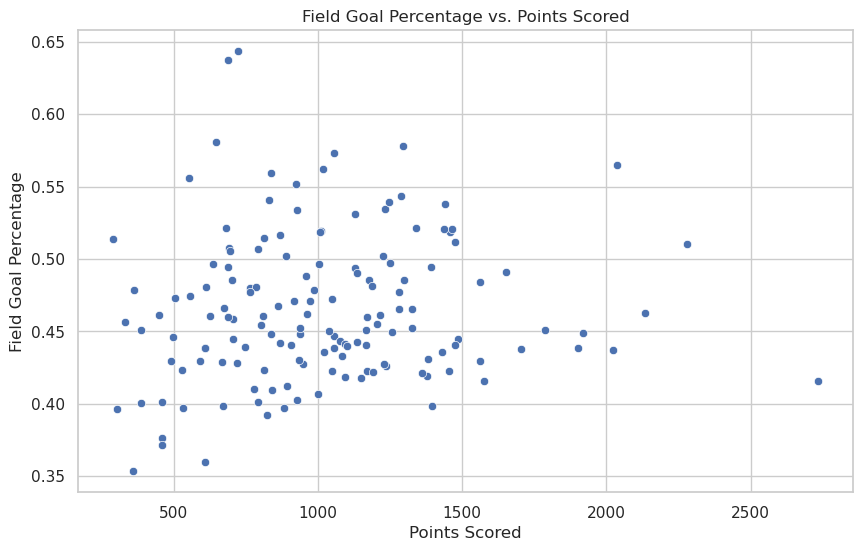

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


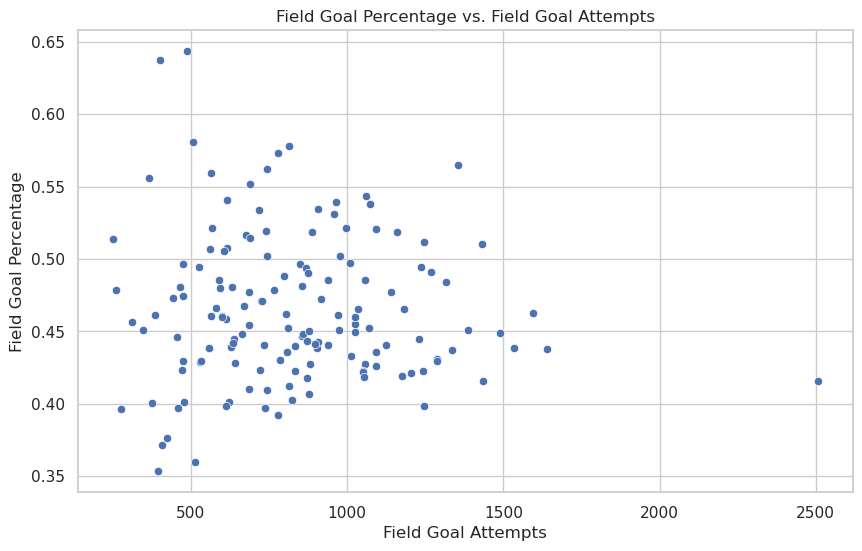

In [5]:
# Scatter plot for points vs. percentage with percentage on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='points', y='percentage', data=basketball_relationships)
plt.title('Field Goal Percentage vs. Points Scored')
plt.xlabel('Points Scored')
plt.ylabel('Field Goal Percentage')
plt.show()

# Scatter plot for attempts vs. percentage with percentage on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='attempts', y='percentage', data=basketball_relationships)
plt.title('Field Goal Percentage vs. Field Goal Attempts')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goal Percentage')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


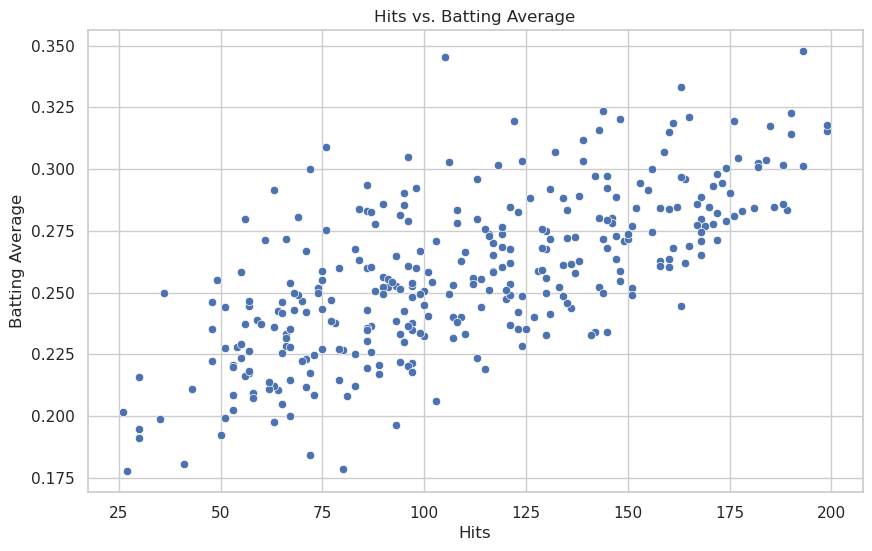

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


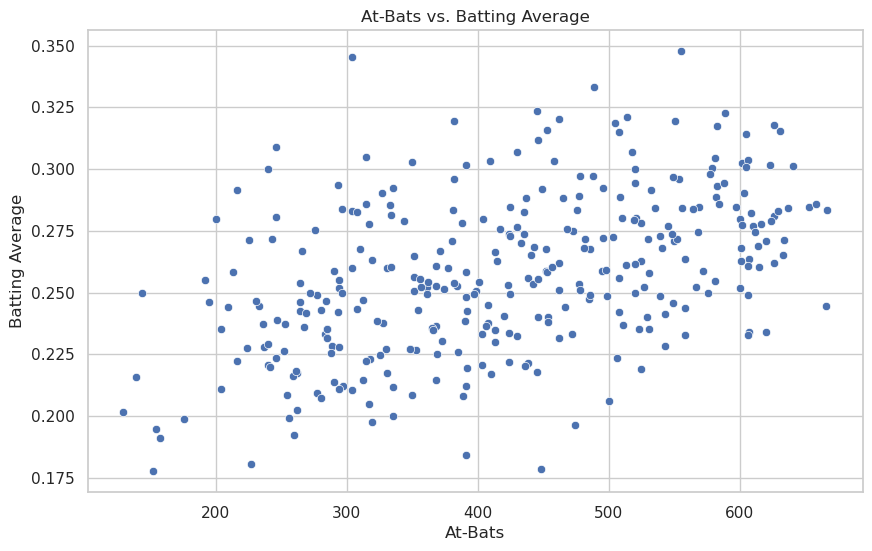

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Scatter plot for hits vs. avg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hits', y='avg', data=baseball_relationships)
plt.title('Hits vs. Batting Average')
plt.xlabel('Hits')
plt.ylabel('Batting Average')
plt.show()

# Scatter plot for atbats vs. avg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atbats', y='avg', data=baseball_relationships)
plt.title('At-Bats vs. Batting Average')
plt.xlabel('At-Bats')
plt.ylabel('Batting Average')
plt.show()


**Observability of the Hot Hand in Basketball vs. Baseball**

**Basketball:**

*Basketball offers frequent and immediate opportunities* for a player to take successive shots within a single game, providing a *clearer context for observing streaks (hot hand).*
The pace of the game and the smaller team size compared to baseball might make individual performance streaks more noticeable.
Psychological factors, such as confidence and momentum, might play a more significant role in a fast-paced game.

**Baseball:**

*Baseball has a more intermittent and individual-focused nature of play (batter vs. pitcher), which might make streaks less observable or more attributed to other factors like pitcher quality.*
The number of at-bats for a player in a single game is limited compared to the number of shots a basketball player can attempt, potentially making hot streaks less apparent.
The defensive strategy in baseball is more static compared to basketball, potentially affecting the impact of a player's hot streak.


**Data and Analysis:**

Gather extensive data on individual player performance over multiple games and seasons to have a substantial sample size.
Analyze shooting percentages in relation to recent successes or failures (e.g., shooting percentage after making the last 2, 3, or more shots).
Consider situational factors like game location, opposition quality, and game context (e.g., playoff games vs. regular season).
Modeling Approach:

Employ a logistic regression model where the outcome variable is the success of a shot, and the predictors include recent performance (e.g., made shots in a row), along with other control variables.
Time-series analysis might be helpful to understand streaks over a game or a series of games.
Regression Model to Establish Hot Hand

**Critical Predictor Variables:**

Recent performance (number of consecutive successful shots).
Player-specific variables (e.g., average shooting percentage, experience).
Game context variables (e.g., game pressure, opposition strength).
Fatigue or rest variables (e.g., minutes played in the game or in recent games).

**Data Requirements:**

A large dataset covering multiple seasons to capture a wide range of situations and player conditions.
Detailed in-game data to control for various game situations and player conditions.
